In [2]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.externals import joblib

# Load data & Read data using pandas

In [3]:
df=pd.read_csv("F:/Pranjali/Data Science/Eval Project/Data Files/baseball.csv")

In [4]:
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


# Perform Statistical Analysis-

In [5]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [6]:
df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

In [7]:
df['ERA'] = df['ERA'].astype('int64')

In [8]:
df.dtypes

W      int64
R      int64
AB     int64
H      int64
2B     int64
3B     int64
HR     int64
BB     int64
SO     int64
SB     int64
RA     int64
ER     int64
ERA    int64
CG     int64
SHO    int64
SV     int64
E      int64
dtype: object

In [9]:
# Checking for skewness
df.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA   -0.133406
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

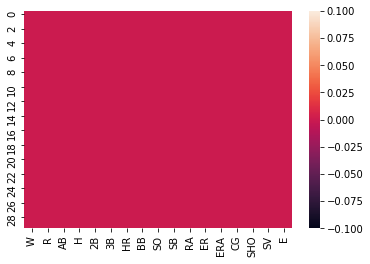

In [10]:
#---to check missing values
sns.heatmap(df.isnull()) 

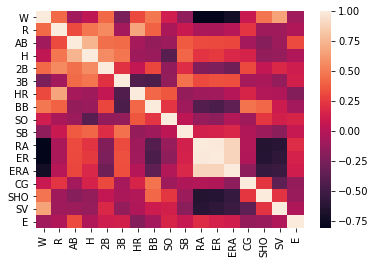

In [11]:
#---to check correlation ;#---to check correlation using heatmap;light color shows highly correlared
dfcor=df.corr()  
sns.heatmap(dfcor) 

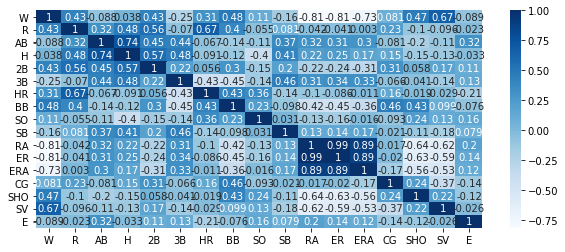

In [12]:
plt.figure(figsize=(10,4))
sns.heatmap(dfcor,cmap='Blues',annot=True)

In [13]:
# Checking for skewness for each of the column
df.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA   -0.133406
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

In [14]:
# Check for the outliers,apply zscore & remove skewness

from scipy.stats import zscore
z_score=abs(zscore(df))
print(df.shape)
df_final=df.loc[(z_score<3).all(axis=1)]
print(df_final.shape)

(30, 17)
(29, 17)


In [15]:
# Separating target & input variables
import numpy as np

df_x=df_final.drop(columns=["W"])
y=df_final[["W"]]

In [16]:
# scalling the input variable
# linear regression algorith requires all feature to be on common scale

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)

In [17]:
# lets again check for skewness
x.skew()

R     -0.215364
AB     0.169573
H      0.783772
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA   -0.207387
CG     0.854980
SHO    0.526943
SV     0.627480
E      0.840271
dtype: float64

# Data Visualization-Unvariate plot

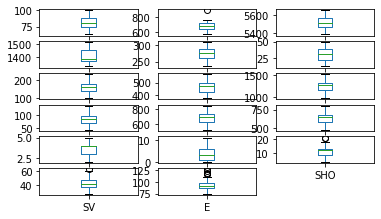

In [18]:
# box and whisker plots
df.plot(kind='box', subplots=True, layout=(7,3), sharex=False, sharey=False)
plt.show()

# Apply Linear Regression Algorithm-

In [19]:
# Split data using train_test_split method

x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = 45,test_size=0.20)

In [20]:
# Interpreting model coefficients
# print the intercept and coefficients

# Linear regression in scikit-learn
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(x_train, y_train)

print(linreg.intercept_)
print(linreg.coef_)

[80.31030785]
[[ 4.56609816e+00 -4.23629541e-02 -1.46695801e-01 -8.89085778e-01
  -1.80710234e-02 -3.99732772e-01 -2.89298550e+00  4.24878470e-01
   7.45070130e-01  1.64542244e+01 -1.80774662e+01 -2.54833213e+00
   1.54816858e+00  3.26597007e+00  6.47613223e+00 -1.15240160e+00]]


In [21]:
# make predictions on the testing set
y_pred = linreg.predict(x_test)

In [22]:
# calculate MAE using scikit-learn
from sklearn import metrics

# Computing the MAE
print("Mean Accuracy Error: ",metrics.mean_absolute_error(y_test, y_pred))

# Computing the MSE
print("Mean Sqr Error:   ",metrics.mean_squared_error(y_test, y_pred))

# Computing the RMSE
print("Root mean sqr error: ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Accuracy Error:  5.982863162367941
Mean Sqr Error:    49.78611410634249
Root mean sqr error:  7.0559275865291085


In [23]:
# Use for loop to iterate rstate to get the r2score.

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model

max_rscore=0
for r_state in range(42,101):
    x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = r_state,test_size=0.20)
    regrn = linear_model.LinearRegression()
    regrn.fit(x_train,y_train)
    y_pred = regrn.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    if r2_scr>max_rscore:
        max_rscore=r2_scr
        final_r_state=r_state
print("max r2 score corresponds to",final_r_state," is ",max_rscore)

max r2 score corresponds to 47  is  0.9303061573753739


In [24]:
from sklearn.svm import SVR
kernellist=['linear','poly','rbf']
for i in kernellist:
    sv=SVR(kernel=i)
    sv.fit(x_train,y_train)
    print(sv.score(x_train,y_train))

0.9212480460345464
0.4304093217592647
0.2768876499854608


In [25]:
#Save the Model using pickle or joblib library
from sklearn.externals import joblib

joblib_file = "joblib_regrn.pkl"             # Save to file in the current working directory
joblib.dump(regrn, joblib_file)
joblib_regrn = joblib.load(joblib_file)      # Load from file
score = joblib_regrn.score(x_test, y_test)   # Calculate the accuracy and predictions
print("Test score for linear regression: {0:.2f} %".format(100 * score))

Test score for linear regression: 28.33 %


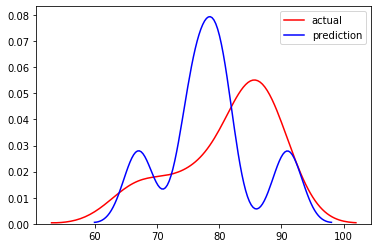

In [26]:
# Visualization of predictions
import seaborn as sns
ax1 = sns.distplot(y_test, hist = False, color = 'r', label = 'actual')
sns.distplot(y_pred, hist = False, color = 'b', label = 'prediction', ax = ax1)

Conclusion - Final score for baseball dataset is 93% ,prediction is slightly varies as per actual